In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pakistanintellectualcapitalcs/Pakistan Intellectual Capital - Computer Science - Ver 2.csv
/kaggle/input/pakistanintellectualcapitalcs/Pakistan Intellectual Capital - Computer Science - Ver 1.csv


# Task to Perform
> 1. Loading Files
> 2. Data Preprocessing
> 3. Exploratory Data Analysis


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime


# Loading File

In [3]:
df = pd.read_csv('/kaggle/input/pakistanintellectualcapitalcs/Pakistan Intellectual Capital - Computer Science - Ver 1.csv',encoding='latin10')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   S#                                         1981 non-null   int64  
 1   Teacher Name                               1981 non-null   object 
 2   University Currently Teaching              1981 non-null   object 
 3   Department                                 1981 non-null   object 
 4   Province University Located                1981 non-null   object 
 5   Designation                                1918 non-null   object 
 6   Terminal Degree                            1440 non-null   object 
 7   Graduated from                             1142 non-null   object 
 8   Country                                    1200 non-null   object 
 9   Year                                       499 non-null    float64
 10  Area of Specialization/R

In [5]:
df.isnull().sum()

S#                                              0
Teacher Name                                    0
University Currently Teaching                   0
Department                                      0
Province University Located                     0
Designation                                    63
Terminal Degree                               541
Graduated from                                839
Country                                       781
Year                                         1482
Area of Specialization/Research Interests    1231
Other Information                            1818
dtype: int64

In [6]:
df.head(5)

,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,1,Dr. Ihsan Ullah,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,NaN,France,NaN,"P2P Networks, Telecommunication Systems",NaN
1,2,Dr. Atiq Ahmed,University of Balochistan,Computer Science & IT,Balochistan,Associate Professor,PhD,NaN,France,NaN,"Wireless Networks, Telecommunication Systems, ...",NaN
2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
3,4,Mr. Muhammad Khalid Badini,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,MS,NaN,NaN,NaN,Operating System & DBMS,On study leave
4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN


# Data Preprocessing

**Droping unnecessary information**

In [7]:
df = df.drop(['S#','Other Information'],axis=1)

In [8]:
df.shape

(1981, 10)

In [9]:
df.head(5)

,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests
0,Dr. Ihsan Ullah,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,NaN,France,NaN,"P2P Networks, Telecommunication Systems"
1,Dr. Atiq Ahmed,University of Balochistan,Computer Science & IT,Balochistan,Associate Professor,PhD,NaN,France,NaN,"Wireless Networks, Telecommunication Systems, ..."
2,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS
3,Mr. Muhammad Khalid Badini,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,MS,NaN,NaN,NaN,Operating System & DBMS
4,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS


**Rename the Columns**

In [10]:
df.rename(columns=({'Teacher Name':'teacher_name','University Currently Teaching':'university_currently_teaching',
                   'Department':'department','Province University Located':'province_university_located',
                   'Designation':'designation','Terminal Degree':'degree','Graduated from':'graduated',
                   'Country':'country','Year':'year','Area of Specialization/Research Interests':'specialization'}),inplace=True)

In [11]:
df.head(5)

,teacher_name,university_currently_teaching,department,province_university_located,designation,degree,graduated,country,year,specialization
0,Dr. Ihsan Ullah,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,NaN,France,NaN,"P2P Networks, Telecommunication Systems"
1,Dr. Atiq Ahmed,University of Balochistan,Computer Science & IT,Balochistan,Associate Professor,PhD,NaN,France,NaN,"Wireless Networks, Telecommunication Systems, ..."
2,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS
3,Mr. Muhammad Khalid Badini,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,MS,NaN,NaN,NaN,Operating System & DBMS
4,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS


In [12]:
df.teacher_name.nunique()

1953

**Cleaning the columns one by one**

In [13]:
df.university_currently_teaching.nunique()

88

In [14]:
df.university_currently_teaching = df.university_currently_teaching.str.lower()

> Removing special characters in string 'university_currently_teaching

In [15]:
df.university_currently_teaching = df.university_currently_teaching.str.replace('(','').str.replace(')',
                                                                                                   '').str.replace(',','').str.replace('?','').str.replace('\d+','').str.replace('[','').str.replace(']','').str.strip()
#str.strip() used to remove from begninning and end

/tmp/ipykernel_21/1086911481.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.university_currently_teaching = df.university_currently_teaching.str.replace('(','').str.replace(')',
/tmp/ipykernel_21/1086911481.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  '').str.replace(',','').str.replace('?','').str.replace('\d+','').str.replace('[','').str.replace(']','').str.strip()
/tmp/ipykernel_21/1086911481.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  '').str.replace(',','').str.replace('?','').str.replace('\d+','').str.replace('[','').str.replace(']','').str.strip()


In [16]:
df.university_currently_teaching.value_counts()

comsats islamabad campus                                                                117
sir syed university of engineering and technology                                        81
university of lahore-pakpattan                                                           71
balochistan university of information technology engineering and management sciences     68
virtual university                                                                       68
                                                                                       ... 
university of loralai                                                                     3
pir mehr ali shah arid agriculture university                                             2
uet-rasul                                                                                 2
islamia college gujranwala                                                                2
university of sahiwal                                                           

**department**

In [17]:
df.department.nunique()

21

In [18]:
df.department.value_counts()

Computer Science                                         1265
Computer Science & IT                                      86
Computer Engineering                                       81
Information Technology                                     78
Computer Science and IT                                    71
Computer Sciences                                          59
Computing                                                  49
Computer Science and Software Engineering                  42
Computing & Information Sciences                           38
Computer Science & Engineering                             29
Institute of Mathematics & Computer Science                29
Computer Science and Engineering                           25
FACULTY OF COMPUTING & ENGINEERING                         22
Computer and Information Sciences                          20
Department of Computer Systems & Software Engineering      16
CS & IT                                                    15
Software

In [19]:
df.department = df.department.str.replace('Computer Science','Computer Science')
df.department = df.department.str.replace('Computer Science & IT','Computer Science & IT')
df.department = df.department.str.replace('Computer Engineering','Computer Engineering')
df.department = df.department.str.replace('Information Technology','Information Technology')
df.department = df.department.str.replace('Computer Science and IT','Computer Science & IT')
df.department = df.department.str.replace('Computer Sciences','Computer Science')
df.department = df.department.str.replace('Computing','Computing')
df.department = df.department.str.replace('Computer Science and Software Engineering','Computer Science and Software Engineering')
df.department = df.department.str.replace('Computing & Information Sciences','Computing & Information Sciences')
df.department = df.department.str.replace('Computer Science & Engineering','Computer Science & Engineering')
df.department = df.department.str.replace('FACULTY OF COMPUTING & ENGINEERING','Faculty of Computing & Engineering')
df.department = df.department.str.replace('Institute of Mathematics & Computer Science','Institute of Mathematics & Computer Science')
df.department = df.department.str.replace('Computer Science and Engineering','Computer Science & Engineering')
df.department = df.department.str.replace('Computer and Information Sciences','Computer and Information Sciences')
df.department = df.department.str.replace('Department of Computer Systems & Software Engineering','Computer Science and Software Engineering')
df.department = df.department.str.replace('CS & IT','Computer Science & IT')
df.department = df.department.str.replace('Software Engineering','Software Engineering')
df.department = df.department.str.replace('ENGINEERING, SCIENCE & TECHNOLOGY','Engineering,Science,Technology')
df.department = df.department.str.replace('CS/IT','Computer Science & IT')
df.department = df.department.str.replace('School of Information and Technology','Information Technology')
df.department = df.department.str.replace('Computer Science and Information Technology','Computer Science & IT')

In [20]:
df.department.nunique()

13

**province_university_located**

In [21]:
df.province_university_located.nunique()

5

In [22]:
df.province_university_located.value_counts()

Punjab         898
Sindh          420
Capital        385
KPK            168
Balochistan    110
Name: province_university_located, dtype: int64

**designation**

In [23]:
df.designation.value_counts().head(10)

Lecturer                      783
Assistant Professor           705
Associate Professor           128
Professor                      46
Tutor/Instructor               46
Senior Lecturer                25
Jr.Lecturer                    19
Research Associate             14
Senior Assistant Professor     12
Head of Department             11
Name: designation, dtype: int64

In [24]:
df.designation.isnull().sum()

63

**degree**

In [25]:
df.degree.nunique()

49

In [26]:
df.degree.value_counts().head(10)

MS        559
PhD       438
BS        101
MSc        59
MCS        34
Ph.D       25
M.Phil     24
Mphil      23
MSCS       19
Phd        17
Name: degree, dtype: int64

In [27]:
df.degree = df.degree.str.replace('M.S','MS')
df.degree = df.degree.str.replace('MIT','MIT')
df.degree = df.degree.str.replace('MS (Scholar)','MS')
df.degree = df.degree.str.replace('Ph.D (Scholar)','Phd')
df.degree = df.degree.str.replace('BSc','BSc')
df.degree = df.degree.str.replace('Doctor of Professional Studies','Phd')
df.degree = df.degree.str.replace('M.A','MA')
df.degree = df.degree.str.replace('MSTN','MSTN')
df.degree = df.degree.str.replace('M.Eng','M.Eng')
df.degree = df.degree.str.replace('BIT','BIT')
df.degree = df.degree.str.replace('B.Ed','B.Ed')
df.degree = df.degree.str.replace('MBS','MBS')
df.degree = df.degree.str.replace('M.Phil leading to PhD','M.Phil leading to PhD')
df.degree = df.degree.str.replace('Master','MS')
df.degree = df.degree.str.replace('Masters','MS')
df.degree = df.degree.str.replace('BSIT','BS')
df.degree = df.degree.str.replace('MSC','MSc')
df.degree = df.degree.str.replace('M.Com','M.Com')
df.degree = df.degree.str.replace('BA','BA')
df.degree = df.degree.str.replace('MA','MA')
df.degree = df.degree.str.replace('Mcs','MCS')
df.degree = df.degree.str.replace('Ph.D(Scholar)','Phd')
df.degree = df.degree.str.replace('MSSE','MSSE')
df.degree = df.degree.str.replace('Bachelors','BSc')
df.degree = df.degree.str.replace('B.E','BE')
df.degree = df.degree.str.replace('MCIT','MCIT')
df.degree = df.degree.str.replace('BSC','BSc')
df.degree = df.degree.str.replace('MSC','MSc')
df.degree = df.degree.str.replace('MSIT','MSIT')
df.degree = df.degree.str.replace('MS','MS')
df.degree = df.degree.str.replace('PhD','Phd')
df.degree = df.degree.str.replace('BS','BS')
df.degree = df.degree.str.replace('MSc','MSc')
df.degree = df.degree.str.replace('MSC','MSc')
df.degree = df.degree.str.replace('Ph.D','Phd')
df.degree = df.degree.str.replace('M.Phil','Mphil')
df.degree = df.degree.str.replace('Mphile','Mphile')
df.degree = df.degree.str.replace('MSCS','MS')
df.degree = df.degree.str.replace('Phd','Phd')
df.degree = df.degree.str.replace('M.E','ME')
df.degree = df.degree.str.replace('Post Doc','Post Doc')
df.degree = df.degree.str.replace('ME','ME')
df.degree = df.degree.str.replace('MBA','MBA')
df.degree = df.degree.str.replace('MPhile','Mphile')
df.degree = df.degree.str.replace('M.Sc','MSc')
df.degree = df.degree.str.replace('BSCS','BS')
df.degree = df.degree.str.replace('PostDoc','Post Doc')
df.degree = df.degree.str.replace('BE','BE')
df.degree = df.degree.str.replace('BCS','BCS')

/tmp/ipykernel_21/3811388185.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.degree = df.degree.str.replace('M.S','MS')
/tmp/ipykernel_21/3811388185.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.degree = df.degree.str.replace('MS (Scholar)','MS')
/tmp/ipykernel_21/3811388185.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df.degree = df.degree.str.replace('Ph.D (Scholar)','Phd')
/tmp/ipykernel_21/3811388185.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df.degree = df.degree.str.replace('M.A','MA')
/tmp/ipykernel_21/3811388185.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df.degree = df.degree.str.replace('M.Eng','M.Eng')
/tmp/ipykernel_21/3811388185.py:11: FutureWarning: The default value of regex will change

In [28]:
df.degree.nunique()

30

In [29]:
df.head(5)

,teacher_name,university_currently_teaching,department,province_university_located,designation,degree,graduated,country,year,specialization
0,Dr. Ihsan Ullah,university of balochistan,Computer Science & IT,Balochistan,Assistant Professor,Phd,NaN,France,NaN,"P2P Networks, Telecommunication Systems"
1,Dr. Atiq Ahmed,university of balochistan,Computer Science & IT,Balochistan,Associate Professor,Phd,NaN,France,NaN,"Wireless Networks, Telecommunication Systems, ..."
2,Dr. Abdul Basit,university of balochistan,Computer Science & IT,Balochistan,Assistant Professor,Phd,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS
3,Mr. Muhammad Khalid Badini,university of balochistan,Computer Science & IT,Balochistan,Assistant Professor,MS,NaN,NaN,NaN,Operating System & DBMS
4,Dr. Waheed Noor,university of balochistan,Computer Science & IT,Balochistan,Assistant Professor,Phd,Asian Institute of Technology,Thailand,NaN,DBMS


**country**

In [30]:
df.country.nunique()

37

In [31]:
df.country.value_counts().head(10)

Pakistan    794
UK          103
USA          54
Malaysia     28
France       27
Austria      24
Germany      22
China        21
Italy        18
Sweden       18
Name: country, dtype: int64

**specialization**

In [32]:
df.specialization.nunique()

682

In [33]:
df.specialization.value_counts()

Software Engineering                                                                                                                                                                                                                                                                       23
SOFTWARE ENGINEERING                                                                                                                                                                                                                                                                        9
Computer Networks                                                                                                                                                                                                                                                                           8
Computer Science                                                                                                                              

In [34]:
df.specialization.nunique()

682

In [35]:
Specialization = pd.DataFrame(df['specialization'])

Specialization.dropna(inplace=True)

Specialization['specialization'] = Specialization['specialization'].str.capitalize()
Specialization['specialization'] = Specialization['specialization'].str.replace('and','')
Specialization['specialization'] = Specialization['specialization'].str.replace(' ','')
Specialization['specialization'] = Specialization['specialization'].str.replace('(','')
Specialization['specialization'] = Specialization['specialization'].str.replace(')','')
Specialization['specialization'] = Specialization['specialization'].str.split(',')

Interest = []  #creating a list to store values

for i in Specialization.specialization:
    for b in i:
        Interest.append(b.strip())
   
df_Interest = pd.DataFrame(Interest) #converting list into dataframe
df_Interest  

/tmp/ipykernel_21/407672733.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Specialization['specialization'] = Specialization['specialization'].str.replace('(','')
/tmp/ipykernel_21/407672733.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Specialization['specialization'] = Specialization['specialization'].str.replace(')','')


,0
0,P2pnetworks
1,telecommunicationsystems
2,Wirelessnetworks
3,telecommunicationsystems
4,multi-agentsystems
...,...
2144,digitalsignalprocessing
2145,numericalmethods
2146,Pruningquantizingcnn
2147,gpgpu


**Renaming the column and count the values**

In [36]:
df_Interest = df_Interest.rename(columns={'0':'Interest'})
Int = df_Interest.value_counts()

Int

Softwareengineering                48
machinelearning                    38
datamining                         26
Computernetworks                   20
softwareengineering                18
                                   ..
analysisofalgorithms                1
analysismethod                      1
analysisdesignofalgorithms          1
analysiscontrolofchaoticsystems     1
xp                                  1
Length: 1497, dtype: int64

# Exploratory Analysis

In [37]:
df.head(5)

,teacher_name,university_currently_teaching,department,province_university_located,designation,degree,graduated,country,year,specialization
0,Dr. Ihsan Ullah,university of balochistan,Computer Science & IT,Balochistan,Assistant Professor,Phd,NaN,France,NaN,"P2P Networks, Telecommunication Systems"
1,Dr. Atiq Ahmed,university of balochistan,Computer Science & IT,Balochistan,Associate Professor,Phd,NaN,France,NaN,"Wireless Networks, Telecommunication Systems, ..."
2,Dr. Abdul Basit,university of balochistan,Computer Science & IT,Balochistan,Assistant Professor,Phd,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS
3,Mr. Muhammad Khalid Badini,university of balochistan,Computer Science & IT,Balochistan,Assistant Professor,MS,NaN,NaN,NaN,Operating System & DBMS
4,Dr. Waheed Noor,university of balochistan,Computer Science & IT,Balochistan,Assistant Professor,Phd,Asian Institute of Technology,Thailand,NaN,DBMS


**Phd, MSc and BSc in provinces**

<Axes: title={'center': 'No of BSs as per provinces'}, xlabel='Provinces', ylabel='Noof BSc'>

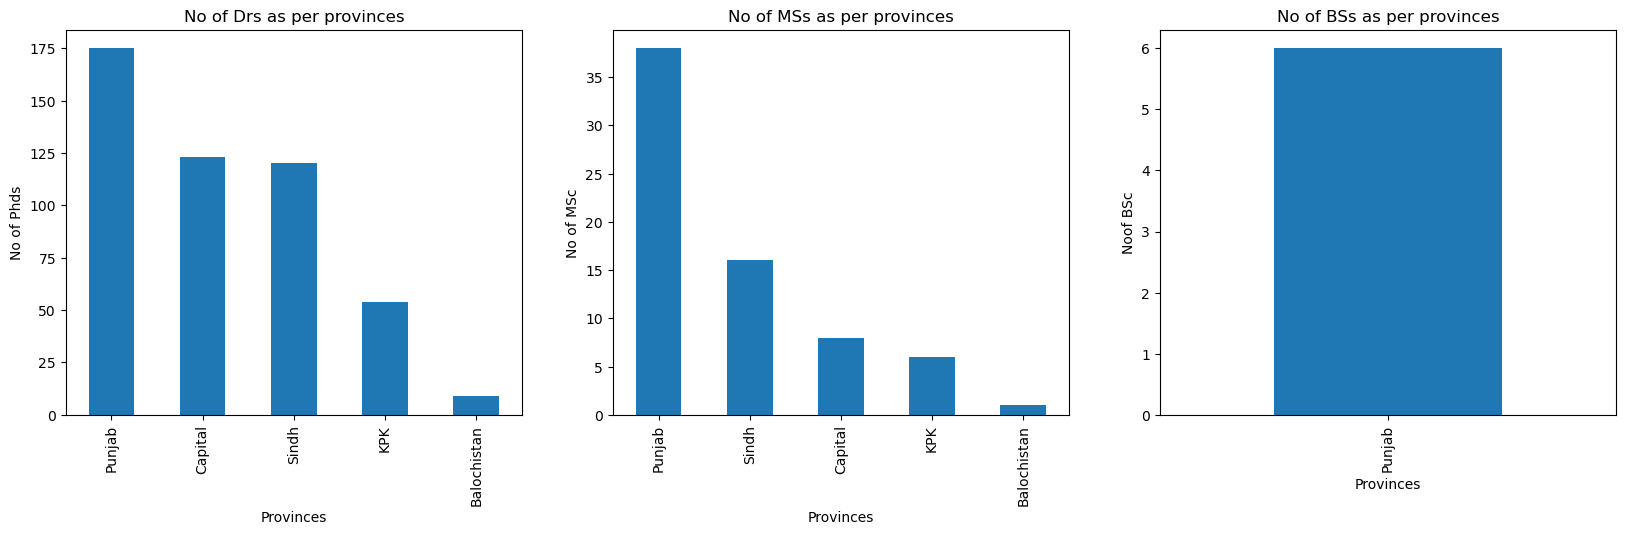

In [38]:
plt.figure(figsize=(20,5))

#Phd in provinces
plt.subplot(1,3,1)
plt.title('No of Drs as per provinces')
plt.xlabel('Provinces')
plt.ylabel('No of Phds')
df[df['degree']=='Phd']['province_university_located'].value_counts().plot.bar()

#MSc in provinces
plt.subplot(1,3,2)
plt.title('No of MSs as per provinces')
plt.xlabel('Provinces')
plt.ylabel('No of MSc')
df[df['degree']=='MSc']['province_university_located'].value_counts().plot.bar()

#BSc in provinces
plt.subplot(1,3,3)
plt.title('No of BSs as per provinces')
plt.xlabel('Provinces')
plt.ylabel('Noof BSc')
df[df['degree']=='BSc']['province_university_located'].value_counts().plot.bar()

**Designations as per universities**

In [39]:
df.designation.value_counts().head(6)

Lecturer               783
Assistant Professor    705
Associate Professor    128
Professor               46
Tutor/Instructor        46
Senior Lecturer         25
Name: designation, dtype: int64

In [40]:
df.designation.nunique()

63

<Axes: title={'center': 'Senior Lecturer in Universities'}, xlabel='University name', ylabel='No. of Senior Lecturer'>

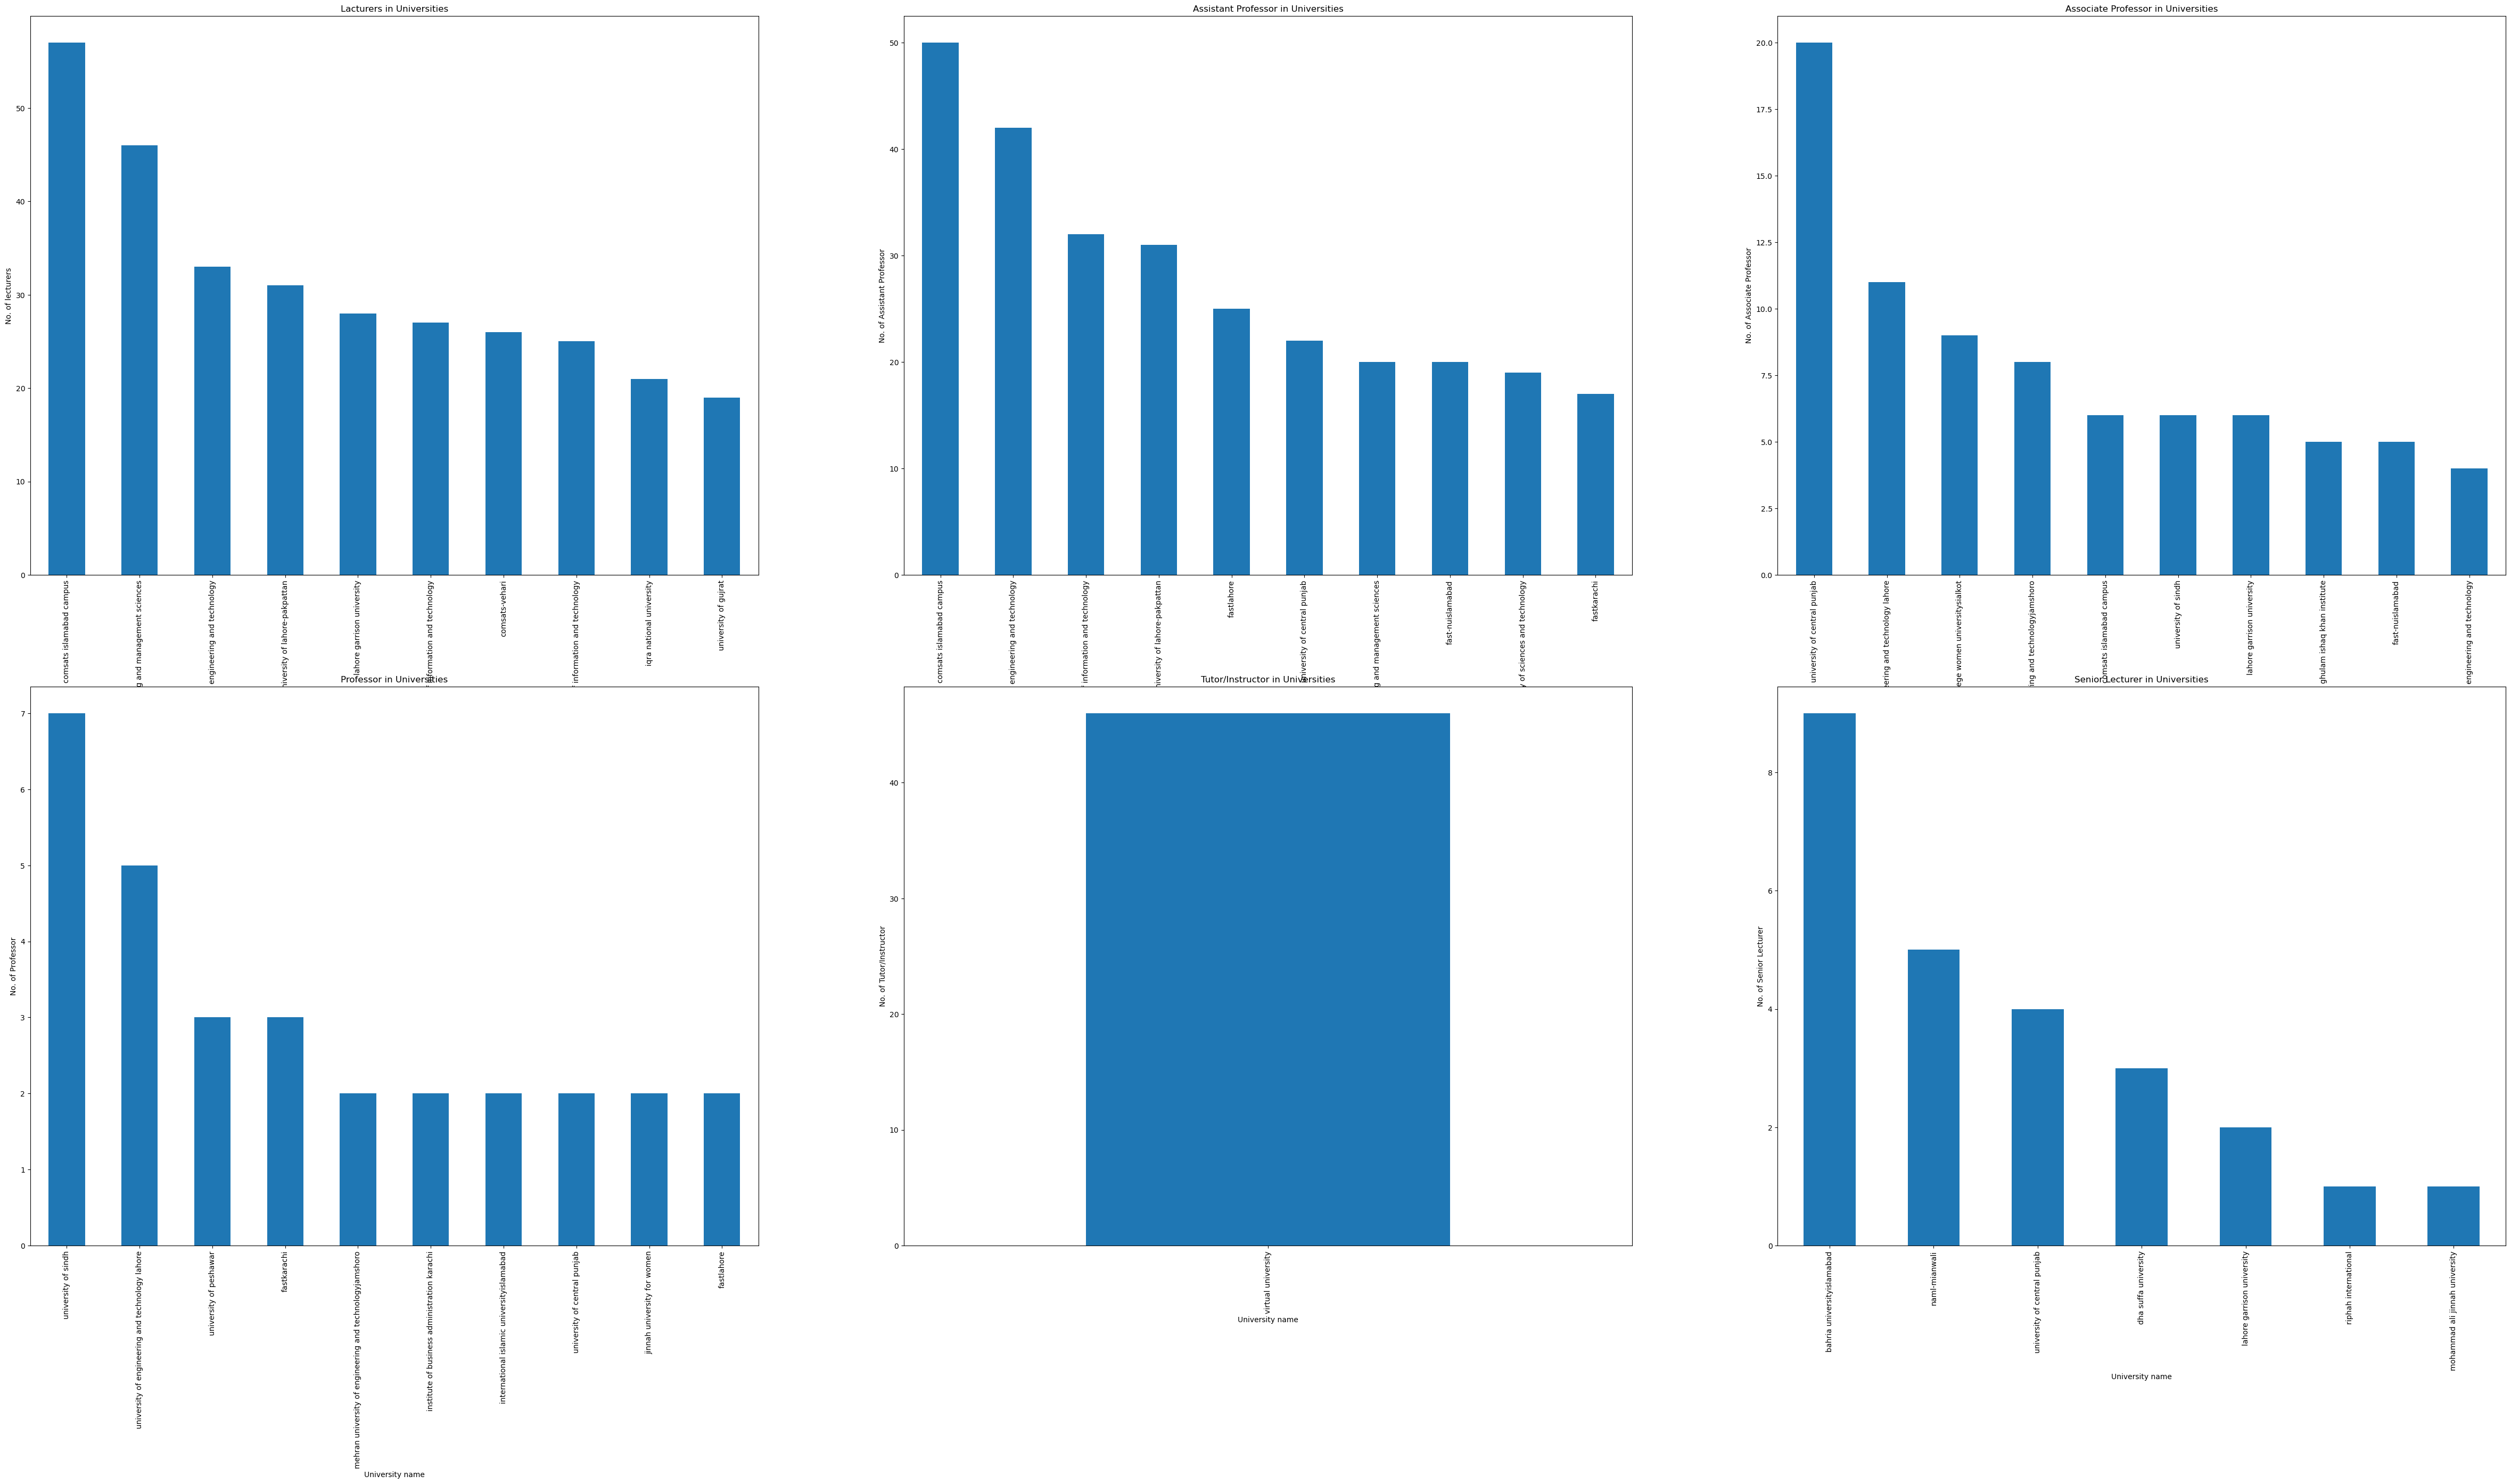

In [41]:
plt.figure(figsize=(60,30))

#No of Lecturers in univesities
plt.subplot(2,3,1)
plt.title('Lacturers in Universities')
plt.xlabel('University name')
plt.ylabel('No. of lecturers')
df[df['designation']=='Lecturer']['university_currently_teaching'].value_counts().head(10).plot.bar()

#No of Assistant Professor in univesities
plt.subplot(2,3,2)
plt.title('Assistant Professor in Universities')
plt.xlabel('University name')
plt.ylabel('No. of Assistant Professor')
df[df['designation']=='Assistant Professor']['university_currently_teaching'].value_counts().head(10).plot.bar()

#No of Associate Professor in univesities
plt.subplot(2,3,3)
plt.title('Associate Professor in Universities')
plt.xlabel('University name')
plt.ylabel('No. of Associate Professor')
df[df['designation']=='Associate Professor']['university_currently_teaching'].value_counts().head(10).plot.bar()

#No of Professor in univesities
plt.subplot(2,3,4)
plt.title('Professor in Universities')
plt.xlabel('University name')
plt.ylabel('No. of Professor')
df[df['designation']=='Professor']['university_currently_teaching'].value_counts().head(10).plot.bar()

#No of Professor in univesities
plt.subplot(2,3,5)
plt.title('Tutor/Instructor in Universities')
plt.xlabel('University name')
plt.ylabel('No. of Tutor/Instructor')
df[df['designation']=='Tutor/Instructor']['university_currently_teaching'].value_counts().head(10).plot.bar()

#No of Senior Lecturer in univesities
plt.subplot(2,3,6)
plt.title('Senior Lecturer in Universities')
plt.xlabel('University name')
plt.ylabel('No. of Senior Lecturer')
df[df['designation']=='Senior Lecturer']['university_currently_teaching'].value_counts().head(10).plot.bar()

# Pakistan's province percentage

Text(0.5, 1.0, 'Universities percentage reagarding provinces')

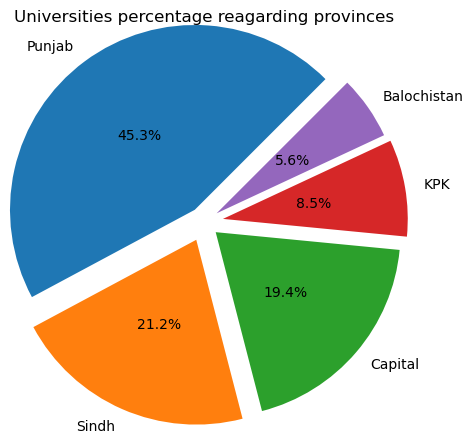

In [42]:
prov_per = df['province_university_located'].value_counts()
prov_per_index = prov_per.index
explode = (0.1,0.125,0.1,0.125,0.1)
plt.figure(figsize=(20,5))

plt.pie(prov_per.values,autopct='%1.1f%%',radius=1.2,startangle=45,pctdistance=0.5,labels=prov_per_index,explode=explode)
plt.title('Universities percentage reagarding provinces')